# 🌙 Exercise: Deep Neural Networks & Hyperparameter Tuning
## Title: The Dream Predictor — How Deep Learning Learns to Imagine

### 🎯 Learning Objective
Understand how **depth** and **hyperparameters** (learning rate, epochs, hidden layers, and activation functions) shape the learning ability of a deep neural network — using a simple yet magical example.

---

## 🧩 Real-Life Analogy

Imagine a scientist named **Aarav** is trying to build a "Dream Predictor" — a DNN that guesses what kind of dream someone will have tonight.

The dream depends on three signals:
- 😴 **Hours of sleep (x₁)**
- 🎧 **Music heard before bed (x₂)**
- 📱 **Screen time (x₃)**

and predicts:
- 🌈 **Dream Intensity Score (ŷ)**

---

## 🧠 Neural Network Architecture

| Layer | Type | Details |
|:------|:------|:---------|
| Input | 3 neurons | Sleep, Music, Screen Time |
| Hidden 1 | 5 neurons | ReLU activation |
| Hidden 2 | 3 neurons | ReLU activation |
| Output | 1 neuron | Sigmoid activation (0–1 dream score) |

Hyperparameters:
- Learning rate (η)
- Number of epochs
- Weight initialization range

---

### 🔍 Step-by-Step Idea

1️⃣ **Forward Pass:** Predict dream intensity from current weights.  
2️⃣ **Loss Computation:** Compare predicted vs. real intensity.  
3️⃣ **Backward Pass:** Adjust all layers via gradients.  
4️⃣ **Tuning:** Experiment with learning rate and layer depth.

---

### 💡 Conceptual Takeaway
Deeper networks can learn *patterns of imagination* — but only when hyperparameters are tuned carefully.  
Too shallow → forgets patterns.  
Too deep → dreams too wildly and forgets reality.

---

## 💻 Code Implementation 


Epoch 000 | Loss: 0.05323
Epoch 050 | Loss: 0.05311
Epoch 100 | Loss: 0.05299
Epoch 150 | Loss: 0.05287
Epoch 200 | Loss: 0.05278
Epoch 250 | Loss: 0.05272


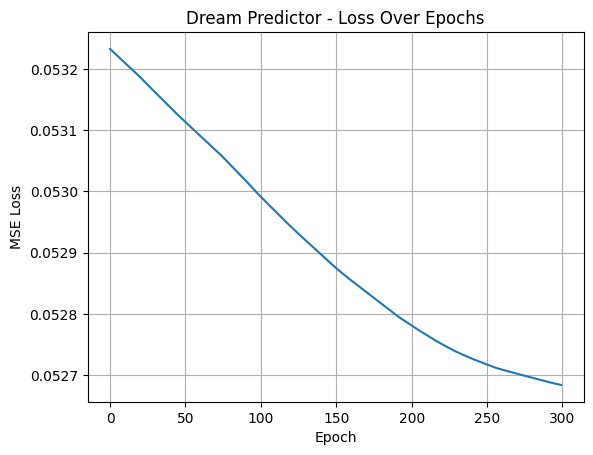


🌈 Predicted Dream Intensity: 0.5060845667658173


C:\Users\sarop\AppData\Local\Temp\ipykernel_17192\1029887896.py:105: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("\n🌈 Predicted Dream Intensity:", float(dream_score))


In [5]:
# 🌙 Dream Predictor: Deep Neural Network with Hyperparameter Exploration
# ------------------------------------------------------------
# This example demonstrates a simple DNN implemented from scratch in NumPy.
# No external deep learning library (like TensorFlow or PyTorch) is used.

import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# 1. Synthetic Dream Data
# --------------------------
np.random.seed(42)
X = np.random.rand(200, 3)  # [sleep_hours, music_level, screen_time]
# True dream score = nonlinear combination of inputs
y_true = (0.5*X[:,0] + 0.3*X[:,1]**2 - 0.2*X[:,2] + 0.1*np.sin(3*X[:,1]))  
y_true = (y_true - y_true.min()) / (y_true.max() - y_true.min())  # normalize

# --------------------------
# 2. Helper Functions
# --------------------------
def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return sigmoid(x) * (1 - sigmoid(x))

# --------------------------
# 3. Hyperparameters
# --------------------------
lr = 0.05          # learning rate
epochs = 300       # training iterations
hidden1, hidden2 = 5, 3

# --------------------------
# 4. Weight Initialization
# --------------------------
W1 = np.random.uniform(-0.5, 0.5, (3, hidden1))
b1 = np.zeros((1, hidden1))
W2 = np.random.uniform(-0.5, 0.5, (hidden1, hidden2))
b2 = np.zeros((1, hidden2))
W3 = np.random.uniform(-0.5, 0.5, (hidden2, 1))
b3 = np.zeros((1, 1))

# --------------------------
# 5. Training Loop
# --------------------------
loss_history = []

for epoch in range(epochs):
    # Forward pass
    z1 = X @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    a2 = relu(z2)
    z3 = a2 @ W3 + b3
    y_pred = sigmoid(z3)

    # Compute loss (MSE)
    loss = np.mean((y_true.reshape(-1,1) - y_pred)**2)
    loss_history.append(loss)

    # Backpropagation
    dL_dy = 2 * (y_pred - y_true.reshape(-1,1)) / len(y_true)
    dL_dz3 = dL_dy * sigmoid_deriv(z3)

    dL_dW3 = a2.T @ dL_dz3
    dL_db3 = np.sum(dL_dz3, axis=0, keepdims=True)

    dL_da2 = dL_dz3 @ W3.T
    dL_dz2 = dL_da2 * relu_deriv(z2)
    dL_dW2 = a1.T @ dL_dz2
    dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)

    dL_da1 = dL_dz2 @ W2.T
    dL_dz1 = dL_da1 * relu_deriv(z1)
    dL_dW1 = X.T @ dL_dz1
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)

    # Gradient descent updates
    W3 -= lr * dL_dW3
    b3 -= lr * dL_db3
    W2 -= lr * dL_dW2
    b2 -= lr * dL_db2
    W1 -= lr * dL_dW1
    b1 -= lr * dL_db1

    # Print progress occasionally
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d} | Loss: {loss:.5f}")

# --------------------------
# 6. Visualize Training
# --------------------------
plt.plot(loss_history)
plt.title("Dream Predictor - Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

# Final Prediction Example
sample = np.array([[0.8, 0.6, 0.3]])
z1 = relu(sample @ W1 + b1)
z2 = relu(z1 @ W2 + b2)
dream_score = sigmoid(z2 @ W3 + b3)
print("\n🌈 Predicted Dream Intensity:", float(dream_score))


### ✨ Student Reflection

1️⃣ Try different learning rates (`lr = 0.001`, `0.1`) — what happens to the dream curve?  
2️⃣ Add one more hidden layer — does it improve or confuse learning?  
3️⃣ Replace ReLU with tanh — does the model become more "dreamy" or "stable"?  
4️⃣ Imagine this DNN as a **human brain** — how does “depth” increase creativity or confusion?

---

### 💬 Discussion Prompt

> Backpropagation teaches each neuron *how much it contributed to a wrong dream.*  
> Hyperparameters decide *how fast it learns to imagine again.*

---

